# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

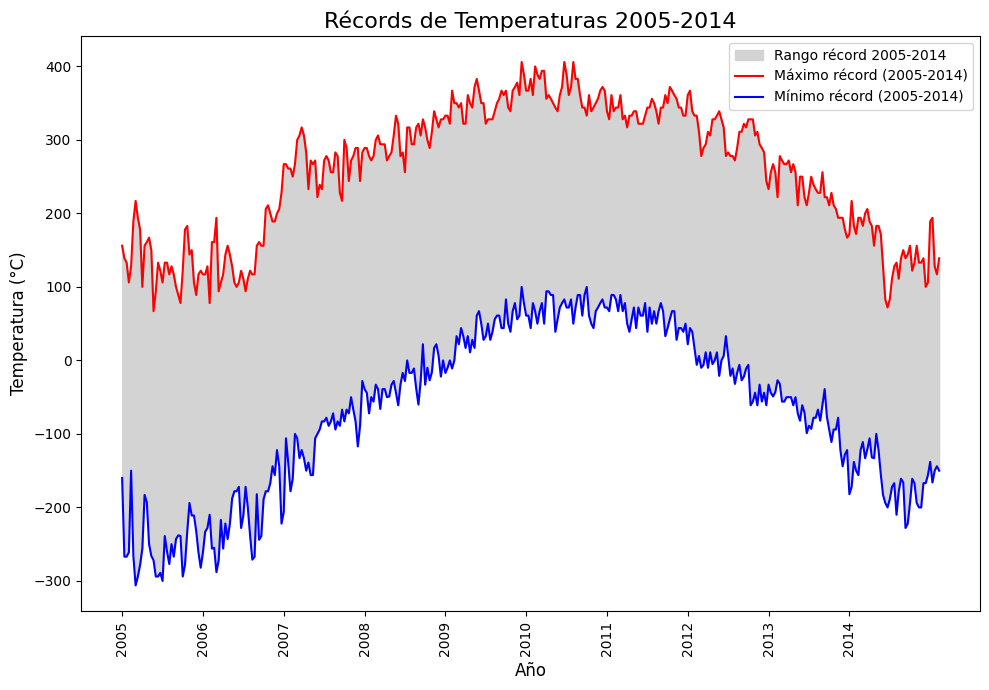

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


# Cargar datos
df = pd.read_csv(r"C:\Users\USUARIO\PycharmProjects\ucu_pad_practice_2023_03\data\C2A2_data\BinnedCsvs_d400\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Eliminar días bisiestos
df['date'] = pd.to_datetime(df['Date'])
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# Dividir el dataset
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.strftime('%m-%d')
data_2005_2014 = df[(df['year'] >= 2005) & (df['year'] <= 2014)]
data_2015 = df[df['year'] == 2015]

# Calcular récords por día del año
record_highs = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()

# Identificar récords superados en 2015
highs_2015 = data_2015[data_2015['Element'] == 'TMAX']
lows_2015 = data_2015[data_2015['Element'] == 'TMIN']

highs_2015_aligned, record_highs_aligned = highs_2015['Data_Value'].align(record_highs, join='left')

# Graficar
plt.figure(figsize=(10, 7))

# Área sombreada entre récords
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='lightgray', label='Rango récord 2005-2014')

# Líneas de máximos y mínimos
plt.plot(record_highs.index, record_highs.values, label='Máximo récord (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Mínimo récord (2005-2014)', color='blue')

# Personalizar el gráfico
plt.title('Récords de Temperaturas 2005-2014', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

# Ajustes de etiquetas y rotación del eje X
plt.xticks(rotation=90, fontsize=10, ha='center')
num_ticks = 10
# Calcular las posiciones de los ticks (se distribuyen de manera uniforme)
xticks_positions = [i * (len(record_highs) // num_ticks) for i in range(num_ticks)]
# Etiquetas correspondientes a los años de 2005 a 2014
xticks_labels = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
plt.xticks(xticks_positions, xticks_labels)

# Leyenda y cuadrícula
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()

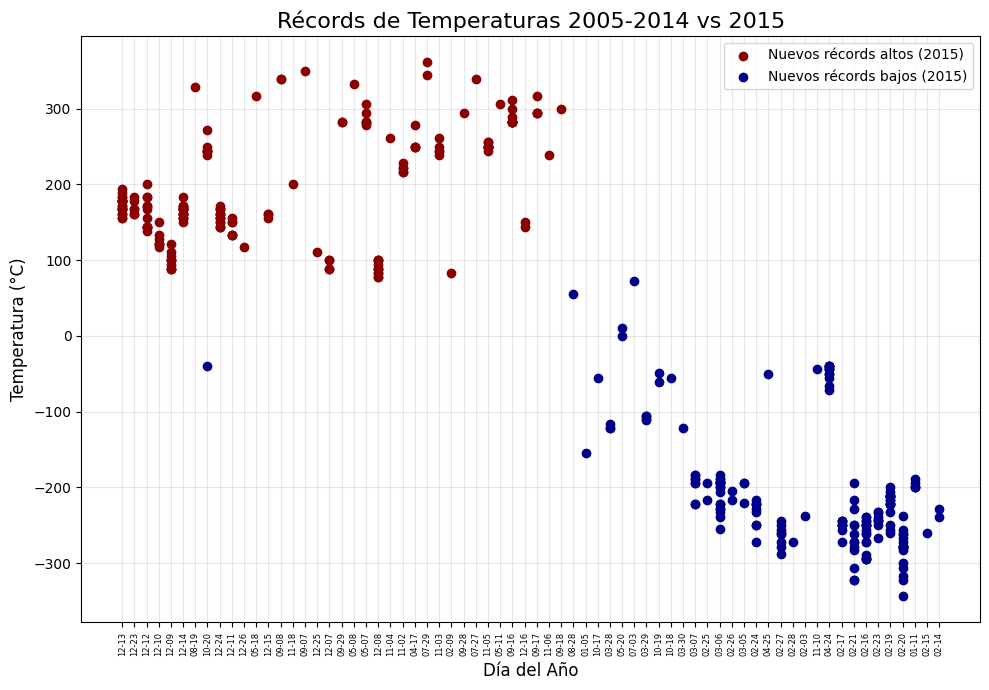

In [2]:
# Alinear datos de 2015 con los récords históricos
highs_2015_aligned, record_highs_aligned = highs_2015.set_index('day_of_year')['Data_Value'].align(record_highs, join='inner')
lows_2015_aligned, record_lows_aligned = lows_2015.set_index('day_of_year')['Data_Value'].align(record_lows, join='inner')

# Identificar días donde se rompieron récords en 2015
highs_broken = highs_2015_aligned[highs_2015_aligned > record_highs_aligned]
lows_broken = lows_2015_aligned[lows_2015_aligned < record_lows_aligned]

plt.figure(figsize=(10, 7))  # Ajusta el tamaño del gráfico (ancho x alto)

# Graficar puntos para los días donde se rompieron récords
plt.scatter(highs_broken.index, highs_broken.values, color='darkred', label='Nuevos récords altos (2015)', zorder=5)
plt.scatter(lows_broken.index, lows_broken.values, color='darkblue', label='Nuevos récords bajos (2015)', zorder=5)

# Personalizar el gráfico
plt.title('Récords de Temperaturas 2005-2014 vs 2015', fontsize=16)
plt.xlabel('Día del Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(rotation=90, fontsize= 6, ha='center')
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente el espaciado para evitar solapamientos
plt.show()